In [1]:
#reads in image fits file (2 page e.g. Dimensions = (#,#,2)) and shows image. Then saves to (#,#) dimension fits.

#ONLY USES EXPOSURE 1-4 AT THE MOMENT

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [3]:
%matplotlib inline

In [4]:
#function reads in file
def read_file(filename):
    try:
        with open(filename, 'r') as file:
            for line in file:
                print(line.rstrip())
    except IOError as e:
        print(e)

In [5]:
#puts all fits into np arrays
hdux_array = ['hdu_list_x1', 'hdu_list_x2', 'hdu_list_x3', 'hdu_list_x4', 'hdu_list_x5', 'hdu_list_x6', 'hdu_list_x7' , 'hdu_list_x8']
hduy_array = ['hdu_list_y1', 'hdu_list_y2', 'hdu_list_y3', 'hdu_list_y4', 'hdu_list_y5', 'hdu_list_y6', 'hdu_list_y7' , 'hdu_list_y8']
filex_array = ['x.01.fits', 'x.02.fits', 'x.03.fits', 'x.04.fits', 'x.05.fits', 'x.06.fits', 'x.07.fits', 'x.08.fits']
filey_array = ['y.01.fits', 'y.02.fits', 'y.03.fits', 'y.04.fits', 'y.05.fits', 'y.06.fits', 'y.07.fits', 'y.08.fits']
tbdatx_array = ['tbdat_x1','tbdat_x2','tbdat_x3','tbdat_x4','tbdat_x5','tbdat_x6','tbdat_x7','tbdat_x8']
tbdaty_array = ['tbdat_y1','tbdat_y2','tbdat_y3','tbdat_y4','tbdat_y5','tbdat_y6','tbdat_y7','tbdat_y8']

In [6]:
for i in range(0,8):
    hdux_array[i] = fits.open(filex_array[i])
    hduy_array[i] = fits.open(filey_array[i])
    tbdatx_array[i] = hdux_array[i][0].data
    tbdaty_array[i] = hduy_array[i][0].data
    print("x[0][0], y[0][0]", tbdatx_array[i][0][0], tbdaty_array[i][0][0])

x[0][0], y[0][0] 0.0 0.0
x[0][0], y[0][0] 4.66850594259 5.04828867496
x[0][0], y[0][0] 7.27828866026 2.65856622777
x[0][0], y[0][0] 1.60340573264 7.751343469
x[0][0], y[0][0] 795.130535742 777.73440886
x[0][0], y[0][0] 799.798730854 782.783313465
x[0][0], y[0][0] 802.408660595 780.3936082
x[0][0], y[0][0] 796.734899714 785.588618379


# First 4 exposures

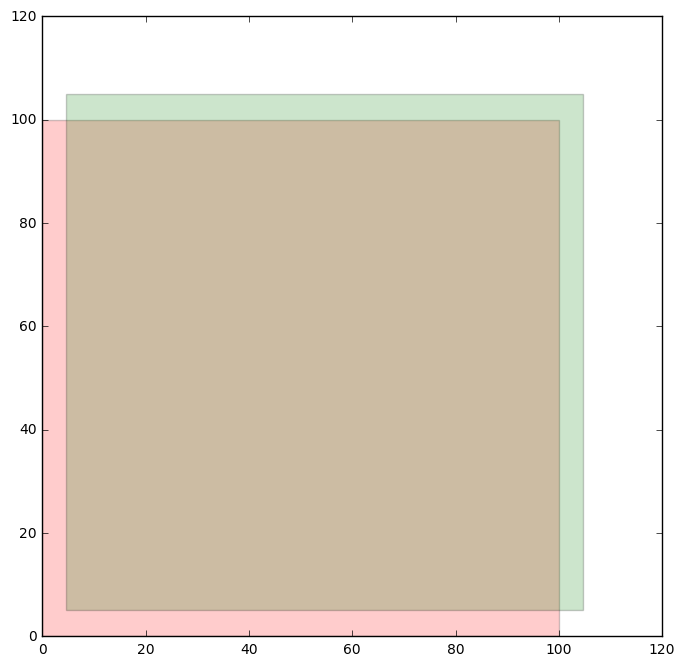

In [7]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

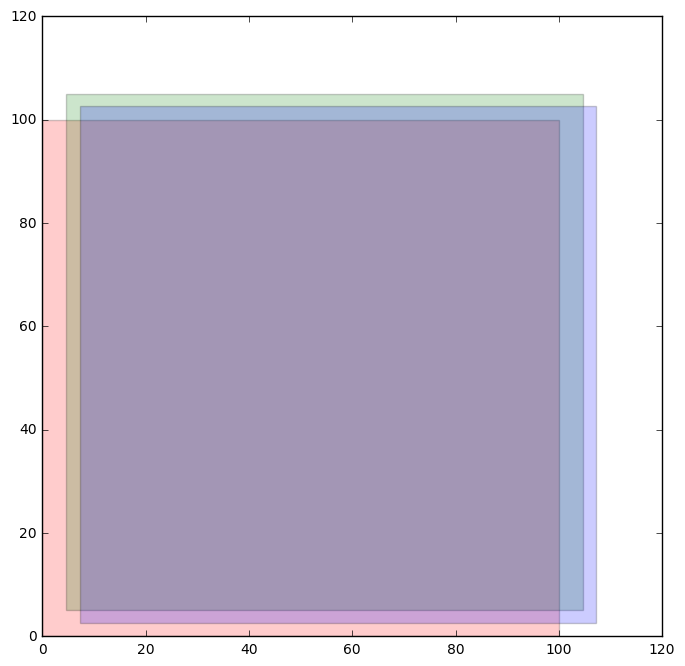

In [8]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

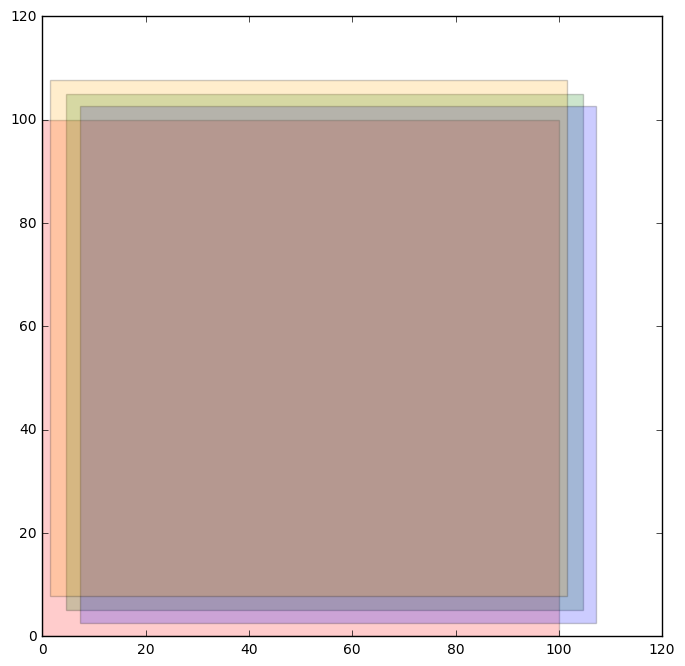

In [9]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

Ok, exposures 5-8 are FAR from 1-4. For now, I'm just going to deal with 1-4, and figure out if I actually have the correct locations for 5-8 later.

# Translations

In [10]:
x_low = tbdatx_array[2][0][0]
x_high = tbdatx_array[0][0][0] + 100
y_low = tbdaty_array[3][0][0]
y_high = tbdaty_array[0][0][0] + 100

print("box with all exposures contained", x_low,x_high,y_low,y_high) # For 4 exposures this is the square that all exposure cover.

x1 = x_low - tbdatx_array[1][0][0]
y1 = y_low - tbdaty_array[1][0][0]
x2 = x_low - tbdatx_array[2][0][0]
y2 = y_low - tbdaty_array[2][0][0]
x3 = x_low - tbdatx_array[3][0][0]
y3 = y_low - tbdaty_array[3][0][0]

box with all exposures contained 7.27828866026 100.0 7.751343469 100.0


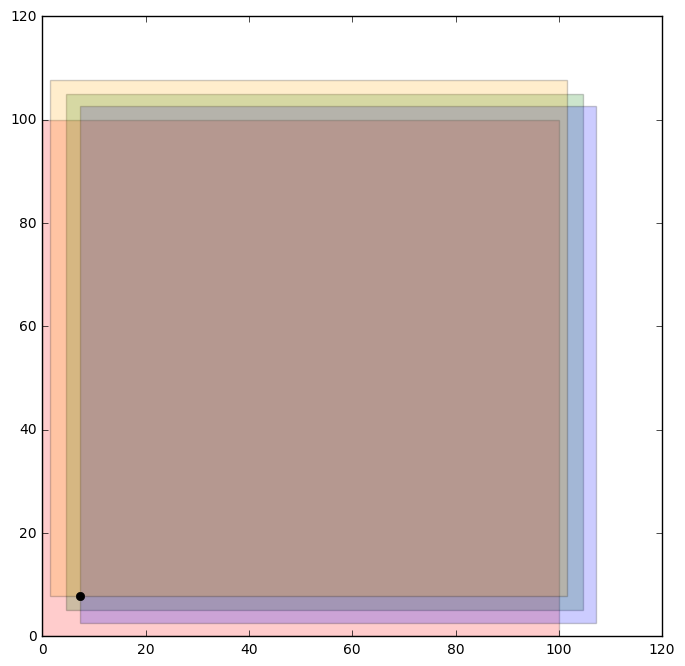

In [11]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
plt.plot(x3+tbdatx_array[3][0][0],y3+tbdaty_array[3][0][0], marker = "o",color = "black")
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

# Inside Square

In [ ]:
hdu_list1x = fits.open('x.01_100.fits')
hdu_list2x = fits.open('x.02_100.fits')
hdu_list3x = fits.open('x.03_100.fits')
hdu_list4x = fits.open('x.04_100.fits')
tbdat1x = hdu_list1x[0].data
tbdat2x = hdu_list2x[0].data
tbdat3x = hdu_list3x[0].data
tbdat4x = hdu_list4x[0].data
hdu_list1y = fits.open('y.01_100.fits')
hdu_list2y = fits.open('y.02_100.fits')
hdu_list3y = fits.open('y.03_100.fits')
hdu_list4y = fits.open('y.04_100.fits')
tbdat1y = hdu_list1y[0].data
tbdat2y = hdu_list2y[0].data
tbdat3y = hdu_list3y[0].data
tbdat4y = hdu_list4y[0].data

fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdat1x[0][0],tbdat1y[0][0],100,100, fc = 'red', alpha =0.2)

# 8 Exposures

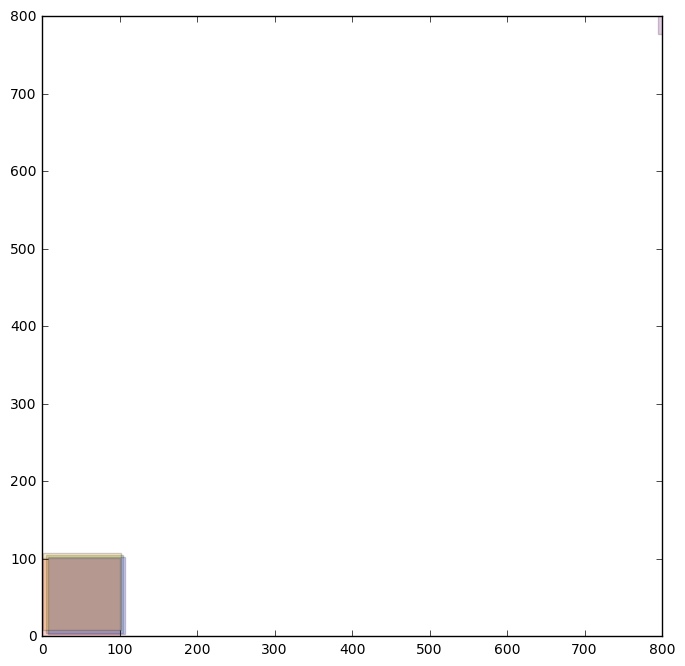

In [12]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][1][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
rect5 = plt.Rectangle((tbdatx_array[4][0][0],tbdaty_array[4][0][0]),100,100, fc = 'purple', alpha = 0.2)
plt.gca().add_patch(rect5)
plt.xlim((0,800))
plt.ylim((0,800))
plt.show()

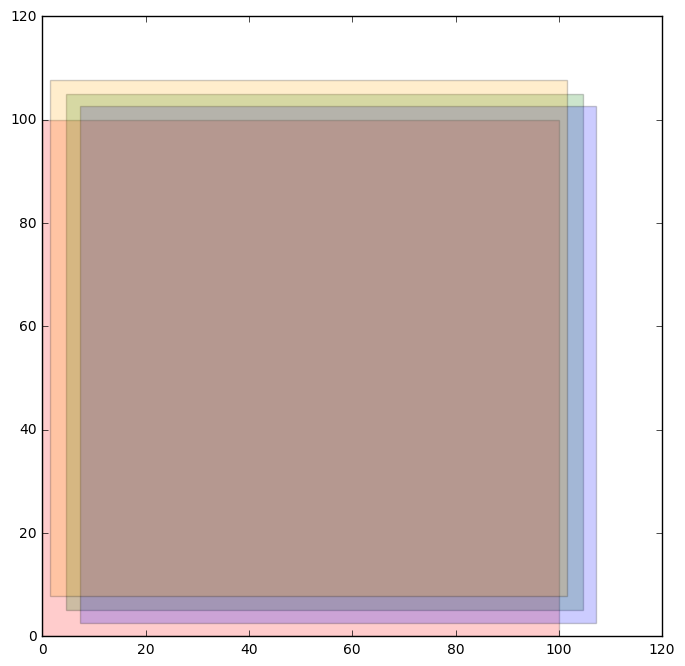

In [13]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
rect5 = plt.Rectangle((tbdatx_array[4][0][0],tbdaty_array[4][0][0]),100,100, fc = 'purple', alpha = 0.2)
plt.gca().add_patch(rect5)
rect6 = plt.Rectangle((tbdatx_array[5][0][0],tbdaty_array[5][0][0]),100,100, fc = 'yellow', alpha = 0.2)
plt.gca().add_patch(rect6)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

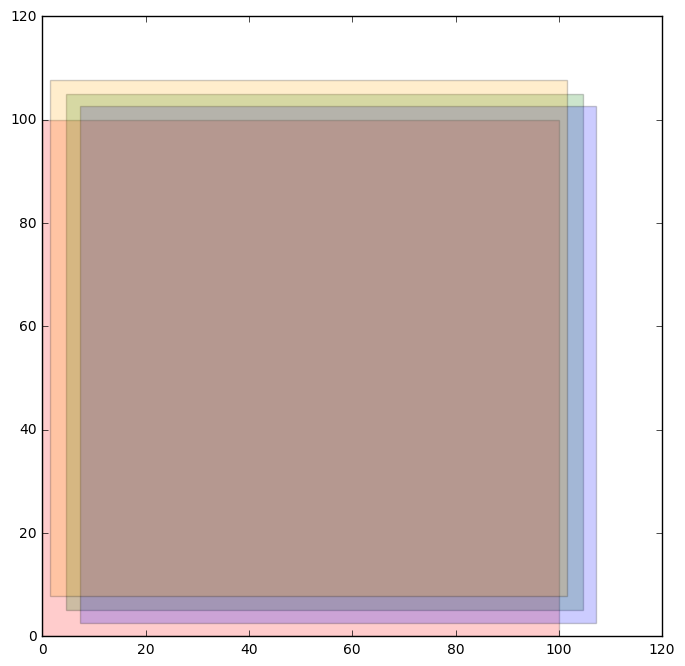

In [14]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
rect5 = plt.Rectangle((tbdatx_array[4][0][0],tbdaty_array[4][0][0]),100,100, fc = 'purple', alpha = 0.2)
plt.gca().add_patch(rect5)
rect6 = plt.Rectangle((tbdatx_array[5][0][0],tbdaty_array[5][0][0]),100,100, fc = 'yellow', alpha = 0.2)
plt.gca().add_patch(rect6)
rect7 = plt.Rectangle((tbdatx_array[6][0][0],tbdaty_array[6][0][0]),100,100, fc = 'black', alpha = 0.2)
plt.gca().add_patch(rect7)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

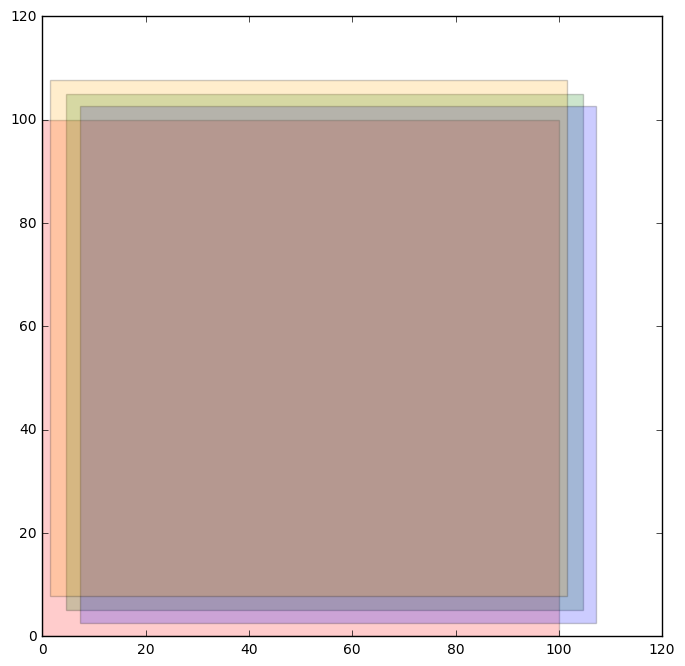

In [15]:
fig = plt.figure(figsize=(8,8))
rect1 = plt.Rectangle((tbdatx_array[0][0][0],tbdaty_array[0][0][0]),100,100, fc = 'red', alpha = 0.2)
plt.gca().add_patch(rect1)
rect2 = plt.Rectangle((tbdatx_array[1][0][0],tbdaty_array[1][0][0]),100,100, fc = 'green', alpha = 0.2)
plt.gca().add_patch(rect2)
rect3 = plt.Rectangle((tbdatx_array[2][0][0],tbdaty_array[2][0][0]),100,100, fc = 'blue', alpha = 0.2)
plt.gca().add_patch(rect3)
rect4 = plt.Rectangle((tbdatx_array[3][0][0],tbdaty_array[3][0][0]),100,100, fc = 'orange', alpha = 0.2)
plt.gca().add_patch(rect4)
rect5 = plt.Rectangle((tbdatx_array[4][0][0],tbdaty_array[4][0][0]),100,100, fc = 'purple', alpha = 0.2)
plt.gca().add_patch(rect5)
rect6 = plt.Rectangle((tbdatx_array[5][0][0],tbdaty_array[5][0][0]),100,100, fc = 'yellow', alpha = 0.2)
plt.gca().add_patch(rect6)
rect7 = plt.Rectangle((tbdatx_array[6][0][0],tbdaty_array[6][0][0]),100,100, fc = 'black', alpha = 0.2)
plt.gca().add_patch(rect7)
rect8 = plt.Rectangle((tbdatx_array[7][0][0],tbdaty_array[7][0][0]),100,100, fc = 'pink', alpha = 0.2)
plt.gca().add_patch(rect8)
plt.xlim((0,120))
plt.ylim((0,120))
plt.show()

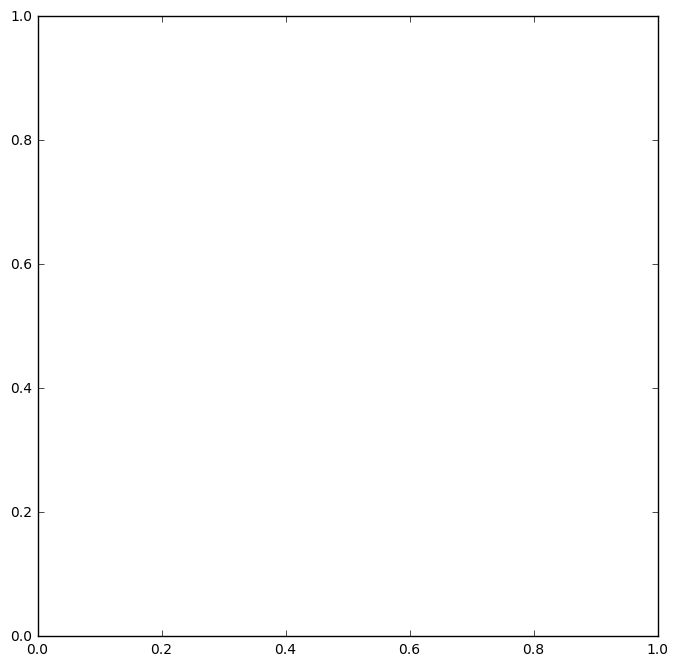

In [16]:
fig = plt.figure(figsize=(8,8))
rect7 = plt.Rectangle((tbdatx_array[6][0][0],tbdaty_array[6][0][0]),100,100, fc = 'black', alpha = 0.2)
plt.gca().add_patch(rect7)
rect8 = plt.Rectangle((tbdatx_array[7][0][0],tbdaty_array[7][0][0]),100,100, fc = 'pink', alpha = 0.2)
plt.gca().add_patch(rect8)
#plt.xlim((0,120))
#plt.ylim((0,120))
plt.show()